In [1]:
import numpy as np
from matplotlib import pyplot as plt
from cmath import sqrt,e
from math import floor

$$
\Large\left\{\begin{array}{c}
\dot{u}=1-u v \\
\dot{v}=p v\left(u-\frac{1+q}{q+v}\right)
\end{array}\right..
$$

$$
\Large
F(k)=\left(\begin{array}{cc}
a-D_{u} k^{2} & b \\
c & d-D_{v} k^{2}
\end{array}\right).
$$

$$
\Large a=f_{u}^{\prime}(\bar{u}, \bar{v}), \quad b=f_{v}^{\prime}(\bar{u}, \bar{v}), \quad c=g^{\prime}_{u}(\bar{u}, \bar{v}), \quad d=g^{\prime}_{v}(\bar{u}, \bar{v})
$$
$$
\Large a=-1, \quad b=-1, \quad c=p, \quad d=\frac{p}{1+q}
$$

$$
\Large{
F(k)=\left(\begin{array}{cc}
-1-D_{u} k^{2} & -1 \\
p & \frac{p}{1+q}-D_{v} k^{2}
\end{array}\right)}
$$

$$\Large \lambda^{2}-\operatorname{tr} F(k) \lambda+\operatorname{det} F(k)=0$$

In [2]:
def det_F(k,Du,Dv,p,q):
    return (-1-Du*k**2)*(p/(q+1)-Dv*k**2) + p

def tr_F(k,Du,Dv,p,q):
    return -1-Du*k**2+p/(q+1)-Dv*k**2

def solve_quad(k,Du,Dv,p,q):
    a = 1
    b = -tr_F(k,Du,Dv,p,q)
    c = det_F(k,Du,Dv,p,q)
    return ((-b-sqrt(b**2-4*a*c))/2).real

In [3]:
1.5//0.5*0.5

1.5

In [20]:
def plot_Re_lambda(k0,k1,Du,Dv,p,q):
    ks = np.arange(k0,k1,0.0001)
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.plot(ks, [solve_quad(k,Du,Dv,p,q) for k in ks], label='$Re(\lambda)$')
    ax.set_title(f'$p={p}, q={q}, D_u={Du}, D_v={Dv}$')
    plt.grid()
    plt.legend()
    plt.show()
    
def plot_tr_and_det(k0,k1,Du,Dv,p,q,log=False):
    colors = ['r','g','b','c','m','y','k']
    ks = np.arange(k0,k1,0.01)
    plt.rcParams['font.size'] = 16
    plt.figure(figsize=(10,8))
    ax = plt.gca()
    ax.plot(ks, [tr_F(k,Du,Dv,p,q) for k in ks], label='$tr(F)$')
    dets = np.array([det_F(k,Du,Dv,p,q) for k in ks])
    ax.plot(ks,dets , label='$det(F)$')
    prev_peaks = None
    curr_color_index = 0
    for k,d in zip(ks,dets):
        cur_peaks = (k*40/2/3.14159265)//0.5*0.5
        if cur_peaks != prev_peaks:
            prev_peaks = cur_peaks
            if d < 0:
                ax.scatter(k,0.1,c=colors[curr_color_index], label = str(cur_peaks),marker='X', s=64)
                curr_color_index+=1
    ax.plot(ks, [int() for k in ks], c='m')
    ax.set_title(f'$p={p}, q={q}, D_u={Du}, D_v={Dv}$')
    if log:
        ax.set_yscale('log')
    plt.grid()
    plt.legend()
    plt.show()
    return ks[dets < 0]

def draw_cos(det):
    plt.figure(figsize=(10,5))
    plt.plot([np.cos(det*x) for x in np.arange(0,40.1,0.1)])
    plt.grid()
    plt.title(f'det_F = {round(det,3)}')
    plt.show()

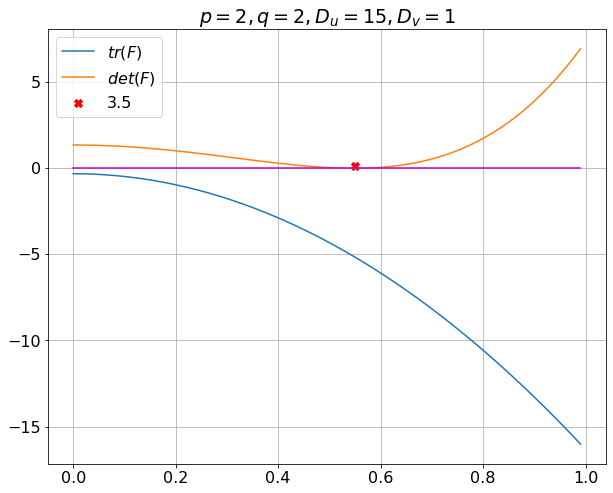

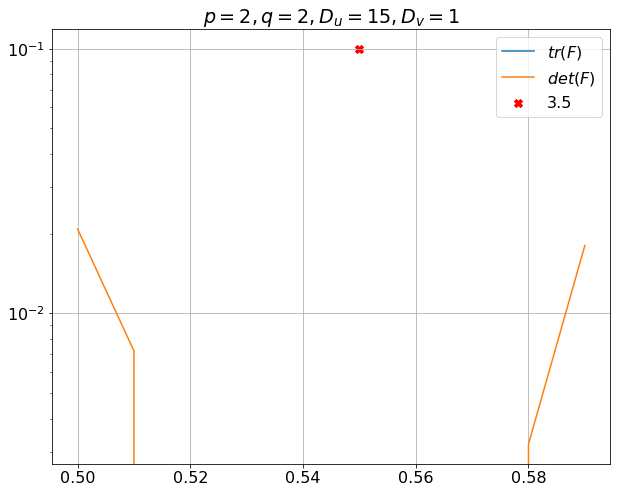

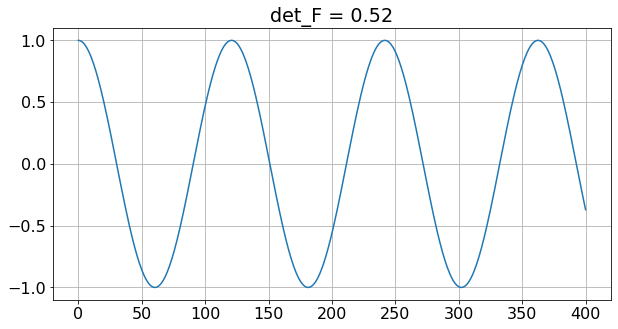

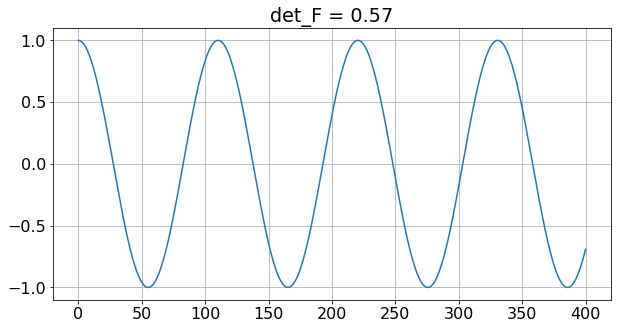

In [21]:
plot_tr_and_det(0,1,15,1,2,2)
dets = plot_tr_and_det(0.5,0.6,15,1,2,2,True)
draw_cos(dets[0])
draw_cos(dets[-1])

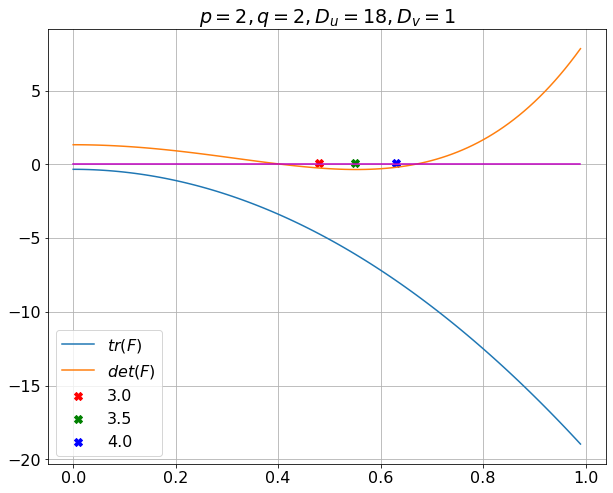

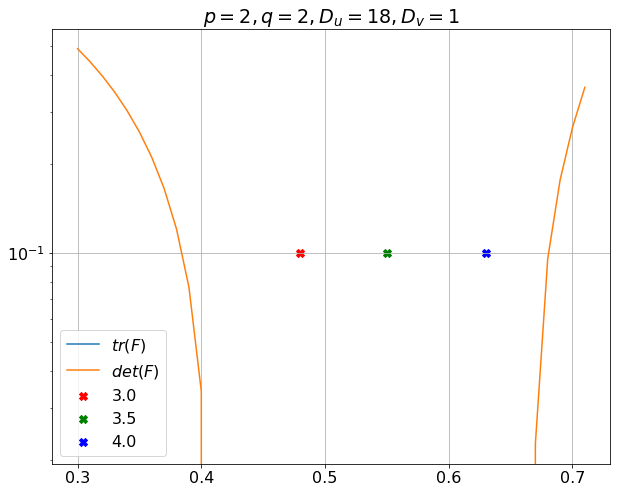

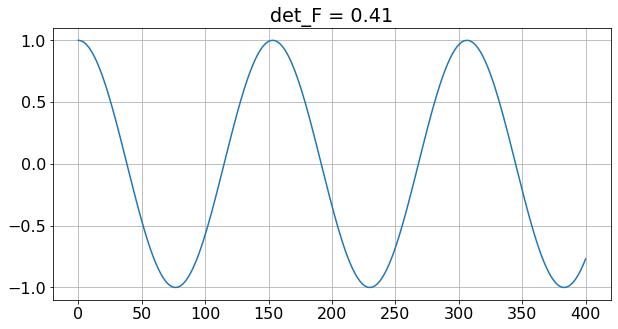

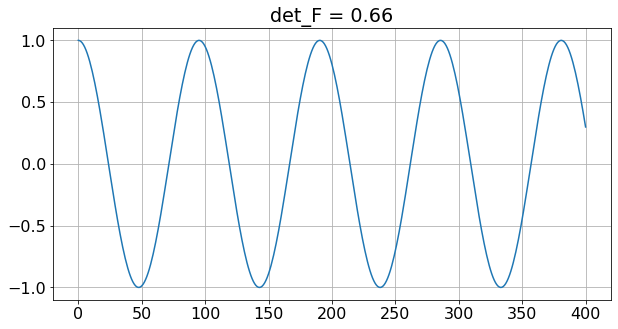

In [22]:
plot_tr_and_det(0,1,18,1,2,2)
dets = plot_tr_and_det(0.3,0.72,18,1,2,2,True)
draw_cos(dets[0])
draw_cos(dets[-1])

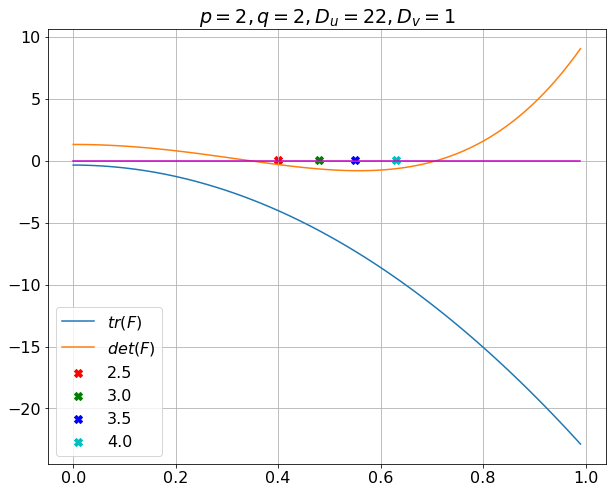

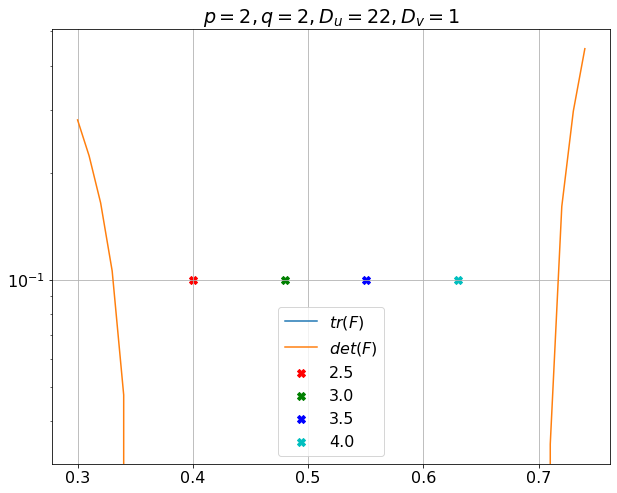

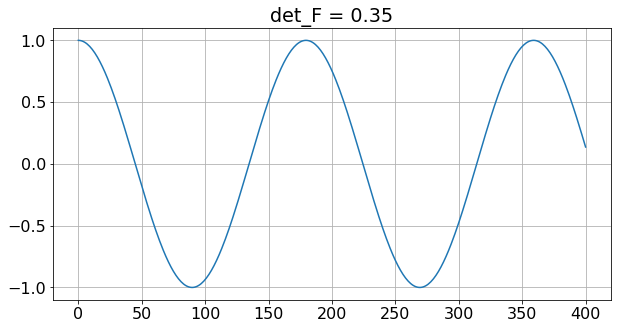

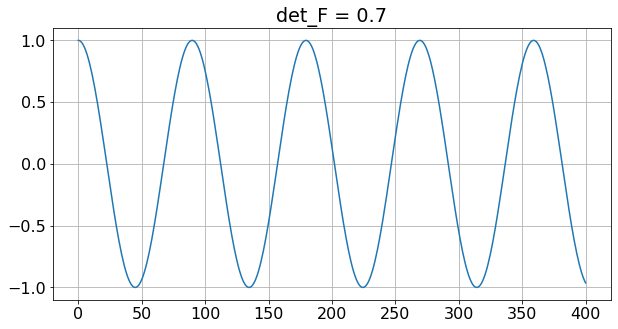

In [23]:
plot_tr_and_det(0,1,22,1,2,2)
dets = plot_tr_and_det(0.3,0.75,22,1,2,2,True)
draw_cos(dets[0])
draw_cos(dets[-1])